In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("insurance_pre.csv")

In [4]:
dataset.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [5]:
dataset=pd.get_dummies(dataset,drop_first=True)

In [6]:
dataset=dataset.astype(int)

In [7]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27,0,16884,0,1
1,18,33,1,1725,1,0
2,28,33,3,4449,1,0
3,33,22,0,21984,1,0
4,32,28,0,3866,1,0


In [8]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [11]:
independend=dataset[['age', 'bmi', 'children',  'sex_male', 'smoker_yes']]

In [12]:
independend.head()

,age,bmi,children,sex_male,smoker_yes
0,19,27,0,0,1
1,18,33,1,1,0
2,28,33,3,1,0
3,33,22,0,1,0
4,32,28,0,1,0


In [13]:
dependend=dataset[['charges']]

In [14]:
dependend.head()

,charges
0,16884
1,1725
2,4449
3,21984
4,3866


In [15]:
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test=train_test_split(independend,dependend,test_size=0.30,random_state=0)

In [16]:
x_train,x_test,y_train,y_test

(      age  bmi  children  sex_male  smoker_yes
 1163   18   28         0         0           0
 196    39   32         0         0           0
 438    52   46         5         0           0
 183    44   26         0         0           0
 1298   33   27         2         1           0
 ...   ...  ...       ...       ...         ...
 763    27   26         0         1           0
 835    42   35         2         1           0
 1216   40   25         0         1           0
 559    19   35         0         1           0
 684    33   18         1         0           0
 
 [936 rows x 5 columns],
       age  bmi  children  sex_male  smoker_yes
 578    52   30         1         1           0
 610    47   29         1         0           0
 569    48   40         2         1           1
 1034   61   38         0         1           0
 198    51   18         0         0           0
 ...   ...  ...       ...       ...         ...
 1261   28   37         1         1           0
 494    21   

In [17]:
from sklearn.tree import DecisionTreeRegressor

In [18]:
regressor=DecisionTreeRegressor()

In [19]:
regressor=regressor.fit(x_train,y_train)

In [20]:
import matplotlib.pyplot as plt
from sklearn import tree

[Text(0.6583257387611299, 0.975, 'x[4] <= 0.5\nsquared_error = 140986061.749\nsamples = 936\nvalue = 13232.425'),
 Text(0.41949710380068583, 0.925, 'x[0] <= 42.5\nsquared_error = 37737583.044\nsamples = 746\nvalue = 8616.247'),
 Text(0.22286234922091205, 0.875, 'x[0] <= 26.5\nsquared_error = 22225668.368\nsamples = 407\nvalue = 5418.302'),
 Text(0.1432683341354831, 0.825, 'x[2] <= 3.5\nsquared_error = 21406988.3\nsamples = 177\nvalue = 3657.299'),
 Text(0.10894071110576345, 0.775, 'x[0] <= 22.5\nsquared_error = 19404191.368\nsamples = 172\nvalue = 3506.738'),
 Text(0.0680799542774636, 0.725, 'x[1] <= 29.5\nsquared_error = 17041013.753\nsamples = 120\nvalue = 3064.283'),
 Text(0.03766093129587294, 0.675, 'x[2] <= 0.5\nsquared_error = 1756409.769\nsamples = 61\nvalue = 2251.033'),
 Text(0.022259655877752377, 0.625, 'x[0] <= 19.5\nsquared_error = 120745.317\nsamples = 41\nvalue = 1825.0'),
 Text(0.012272891348814824, 0.575, 'x[3] <= 0.5\nsquared_error = 68779.777\nsamples = 23\nvalue = 16

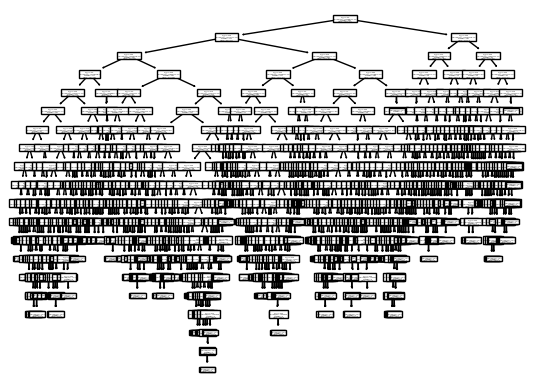

In [21]:
tree.plot_tree(regressor)

In [22]:
plt.show()

In [23]:
y_pred = regressor.predict(x_test)

In [24]:
from sklearn.metrics import r2_score

In [25]:
r_score = r2_score(y_test,y_pred)

In [26]:

r_score

0.6540712422574639